<a href="https://colab.research.google.com/github/mfinzi/equivariant-MLP/blob/master/emlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EMLP Quickstart

In [ ]:
%%capture
!pip install git+https://github.com/mfinzi/equivariant-MLP.git

In [ ]:

from emlp.solver.representation import T,V,sparsify_basis
from emlp.solver.groups import *
import jax.numpy as jnp
import logging
logging.getLogger().setLevel(logging.INFO)

EMLP computes the symmetric subspace for a linear representation $\rho$ and a matrix group $G$, solving the constraint to find an element $v\in V$ that satisfies$$\forall g\in G: \ \ \rho(g)v=v$$.

For example, we can find invariant vectors of the cyclic translation group $\mathbb{Z}_n$ which is just the constant $\vec{1}$ scaled to have unit norm. 

In [ ]:
V(Z(5)).symmetric_basis()

DeviceArray([[0.44721365],
             [0.44721362],
             [0.44721365],
             [0.44721365],
             [0.44721365]], dtype=float32)

Each implemented group comes with a faithful 'base' representation $V$. Because faithful representations are one-to-one, we can build any representation by transforming this base representation.

We provide several operators to transform and construct representations in different ways built and later go on to show how to do this more generally. In our type system, representations can be combined with the direct sum $\rho_a \oplus\rho_b$ operator, the tensor product $\rho_a\otimes\rho_b$, the dual $\rho^*$. We implement these with the python operators `+`, `*`, and `.T`.



In [ ]:
V+V,  V*V,  V.T

((V+V), V⊗V, V*)

We can combine and use these operators interchangeably:

In [ ]:
(V+V.T)*(V*V.T+V)

(V+V*)⊗(V⊗V*+V)

We use the shorthand $cV$ can be used for $V\oplus V\oplus...\oplus V$ and $V^c = V\otimes V\otimes...\otimes V$, not that this different from the typical notation with cartesian products of sets.

In [ ]:
5*V*2

(V+V+V+V+V+V+V+V+V+V)

In [ ]:
2*V**3

(V⊗V⊗V+V⊗V⊗V)

When a particular symmetry group is specified, the representation can be collapsed down to a more compact form:

In [ ]:
2*V(G)**3

2V³

In [ ]:
(2*V**3)(G)

2V³

Linear maps from $V_1\rightarrow V_2$ have the type $V_2\otimes V_1^*$. The `V>>W` is shorthand for `W*V.T` and produces linear maps from `V` to `W`.

Imposing (cyclic) Translation Equivariance $G=\mathbb{Z}_n$ on linear maps $V\rightarrow V$ yields circular convolutions (circulant matrices) which can be expressed as a linear combination of $n$ basis elements of size $n\times n$.

In [ ]:
G = Z(6)
repin = V(G)
repout = V(G)
conv_basis = (repin>>repout).symmetric_basis()
print(conv_basis.shape)

(36, 6)


While we provide an orthogonal basis, these bases are not always easy to make sense of as an array of numbers (any rotation of an orthogonal basis is still an orthogonal basis)

In [ ]:
conv_basis[:,0]

DeviceArray([-0.00200776, -0.25157794,  0.31927773,  0.0072209 ,
             -0.03698727,  0.00357165,  0.00357159, -0.00200781,
             -0.25157797,  0.31927782,  0.00722108, -0.03698722,
             -0.03698726,  0.00357183, -0.00200774, -0.2515779 ,
              0.31927767,  0.00722109,  0.00722104, -0.03698728,
              0.00357171, -0.00200778, -0.25157782,  0.31927767,
              0.3192777 ,  0.00722104, -0.03698733,  0.00357174,
             -0.00200774, -0.2515779 , -0.25157785,  0.3192777 ,
              0.00722107, -0.03698731,  0.00357177, -0.0020077 ],            dtype=float32)

However, we provide a utility function to sparsify the basis and visualize the results. If the program succeeds and the basis can be separated into disjoint vectors, then we can plot the different basis elements super imposed as different colors. Below is the familiar circulant convolution matrix.

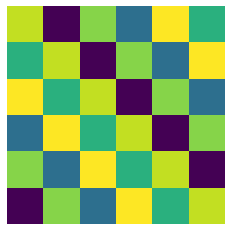

In [ ]:
(repin>>repout).visualize(repout.size(),repin.size())

2D translation equivariange $G=\mathbb{Z}_n\times \mathbb{Z}_n$ yields 2D convolutions (bicurculant matrices)

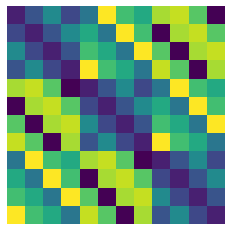

In [ ]:
G = Z(3)*Z(4)
repin = V(G)
repout = V(G)
(repin>>repout).visualize(repout.size(),repin.size())

How about the permutation group $G=S_n$, where the vector space $V$ represents a set of elements? In deep sets it was shown there are only two basis elements for equivariant linear maps $V\rightarrow V$.

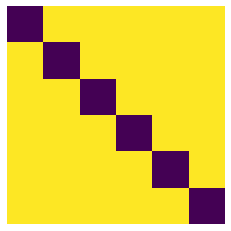

In [ ]:
repin = V(S(6))
repout = V(S(6))
(repin>>repout).visualize(repout.size(),repin.size())

What about graphs, which are composed both of sets as well as adjacency matrices or graph laplacians? These matrices are examples of objects from $V\otimes V$ with $G=S_n$, and in Invariant and Equivariant Graph Networks () it was shown through a challenging proof that there are at most 15 basis elements which were derived analytically. We can solve for them here:

(1296, 15)


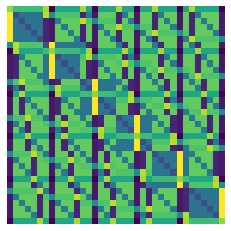

In [ ]:
repin = V(S(6))**2
repout = V(S(6))**2
print((repin>>repout).symmetric_basis().shape)
(repin>>repout).visualize(repout.size(),repin.size())

How about maps from graphs to sets? Lets say a graph consists of one node feature and one edge feature which can be represented with the $\oplus$ operator.

(252, 7)


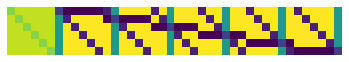

In [ ]:
W = V(S(6))
repin = W+W**2
repout = W
print((repin>>repout).symmetric_basis().shape)
(repin>>repout).visualize(repout.size(),repin.size())

But more fun than continuous groups are discrete groups!
How about the $2$D rotation group $SO(3)$. It's well known that the only equivariant object for the vector space $V^{\otimes 3}$ is the Levi-Civita symbol $\epsilon_{ijk}$. Here color inverses denote 1,-1 pairs.

(27, 1)


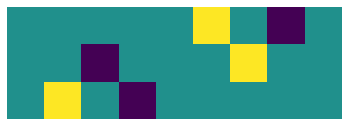

In [ ]:
W = V(SO(3))
repin = W**2
repout = W
Q = (repin>>repout).symmetric_basis()
print(Q.shape)
(repin>>repout).visualize(repout.size(),repin.size())

In [ ]:
print(sparsify_basis(Q).reshape(3,3,3))

[[[ 0.  0.  0.]
  [ 0.  0.  1.]
  [ 0. -1.  0.]]

 [[ 0.  0. -1.]
  [ 0.  0.  0.]
  [ 1.  0.  0.]]

 [[ 0.  1.  0.]
  [-1.  0.  0.]
  [ 0.  0.  0.]]]


# Mixing representations from different groups

In [ ]:
rep = 2*T(1)(Z(3))*T(1)(S(4))+T(1)(SO(2))

In [ ]:
(rep>>rep)

V²+4V_S(4)⊗V_SO(2)⊗V_Z(3)+4V²_S(4)⊗V²_Z(3)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
P = (rep>>rep).symmetric_projector()
v= np.random.rand(P.shape[-1])-.5
v=P@v

(-0.5, 25.5, 25.5, -0.5)

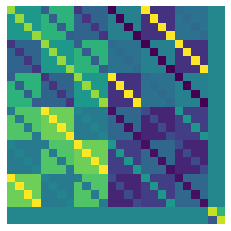

In [ ]:
plt.imshow(v.reshape(rep.size(),rep.size()))
plt.axis('off')

In [ ]:
repin,repout = T(1)(SO(3))*T(2)(S(4)),T(2)(SO(3))*T(1)(S(4))
repin>>repout

V³_SO(3)⊗V³_S(4)

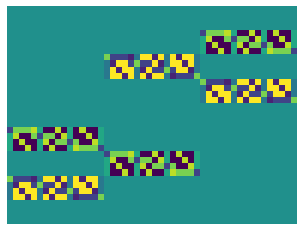

In [ ]:
(repin>>repout).visualize(repout.size(),repin.size())

# Multilinear Maps

Since `a>>b` is a linear map, you may think to extrapolate `a>>(b>>c)` as multilinear, and this works!